In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"C:\Users\THE_DE_V_IL\Documents\GitHub\Data_Science_and_analytics\time_series\fcc-forum-pageviews.csv", parse_dates=["date"], index_col=["date"])


In [2]:
# Clean data
upper_bound = df.value.quantile(0.975)
lower_bound = df.value.quantile(0.025)
df = df[(df.value <= upper_bound) & (df.value >= lower_bound)]

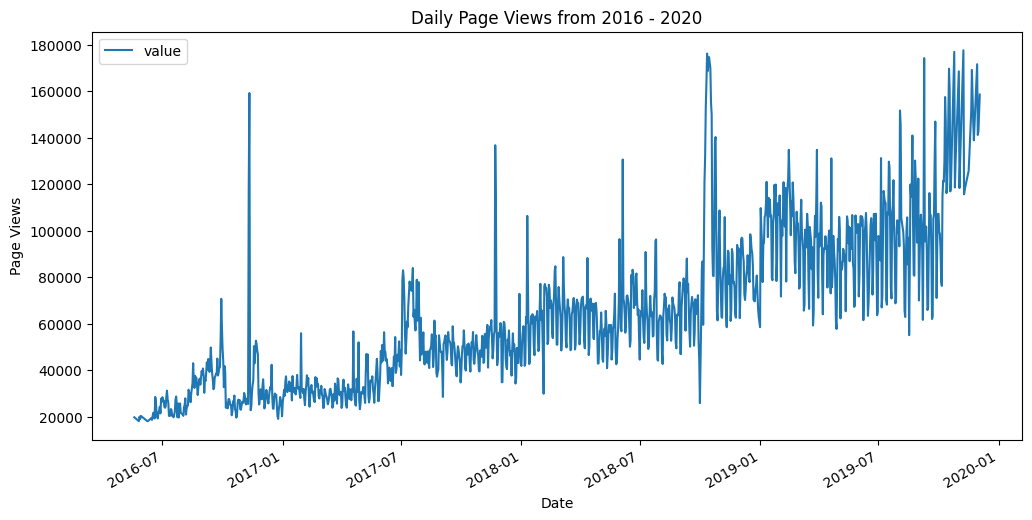

In [27]:


def draw_line_plot(data):
    # Draw line plot
    fig, ax = plt.subplots()
    data.plot(ax=ax)
    fig.set_size_inches(12, 6)
    ax.set_title("Daily Page Views from 2016 - 2020")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    # Save image and return fig 
    fig.savefig('line_plot.png')
    plt.show()


# Call the function only once with a DataFrame object named data
draw_line_plot(df)


C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_16844\3352193306.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bar = df_bar.groupby(["year", "month"]).mean()


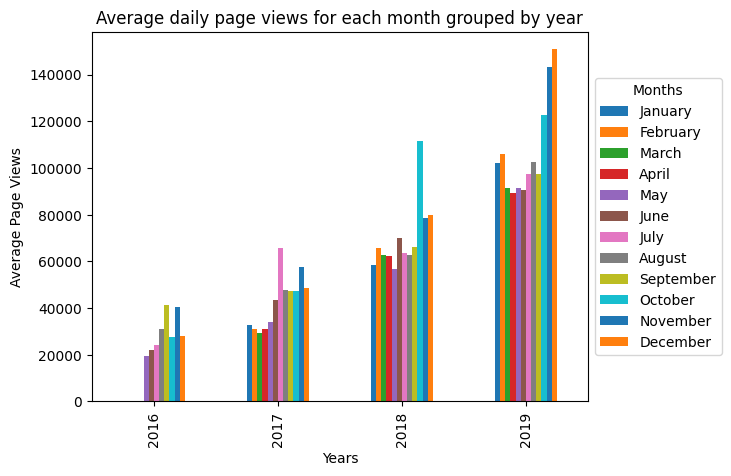

In [30]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['year'] = [d.year for d in df_bar.date]
    df_bar['month'] = [d.strftime('%B') for d in df_bar.date] # change %b to %B to get full month name
    df_bar.month = pd.Categorical(df_bar.month, categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)

    df_bar = df_bar.groupby(["year", "month"]).mean()
    df_bar = df_bar.reset_index()
    # Draw bar plot
    fig, ax = plt.subplots()
    df_bar.pivot(index="year", columns="month", values="value").plot.bar(ax=ax)
    ax.set_title("Average daily page views for each month grouped by year")
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(title="Months",loc="center left", bbox_to_anchor=(1.0, 0.5)) 
    ax.set_xticklabels(['2016', '2017', '2018', '2019'])
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    
draw_bar_plot()

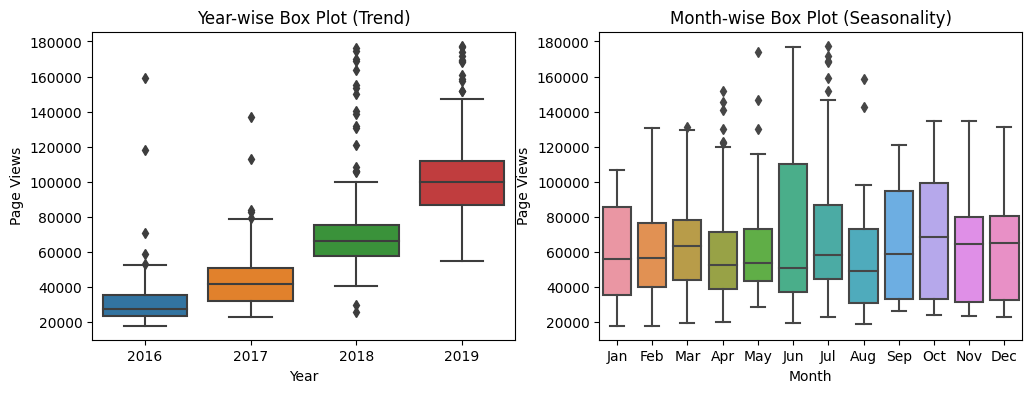

In [33]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    sns.boxplot(x="year", y="value", data=df_box, ax=ax1)
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views") 
    
    sns.boxplot(x="month", y="value", data=df_box, ax=ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')


draw_box_plot()